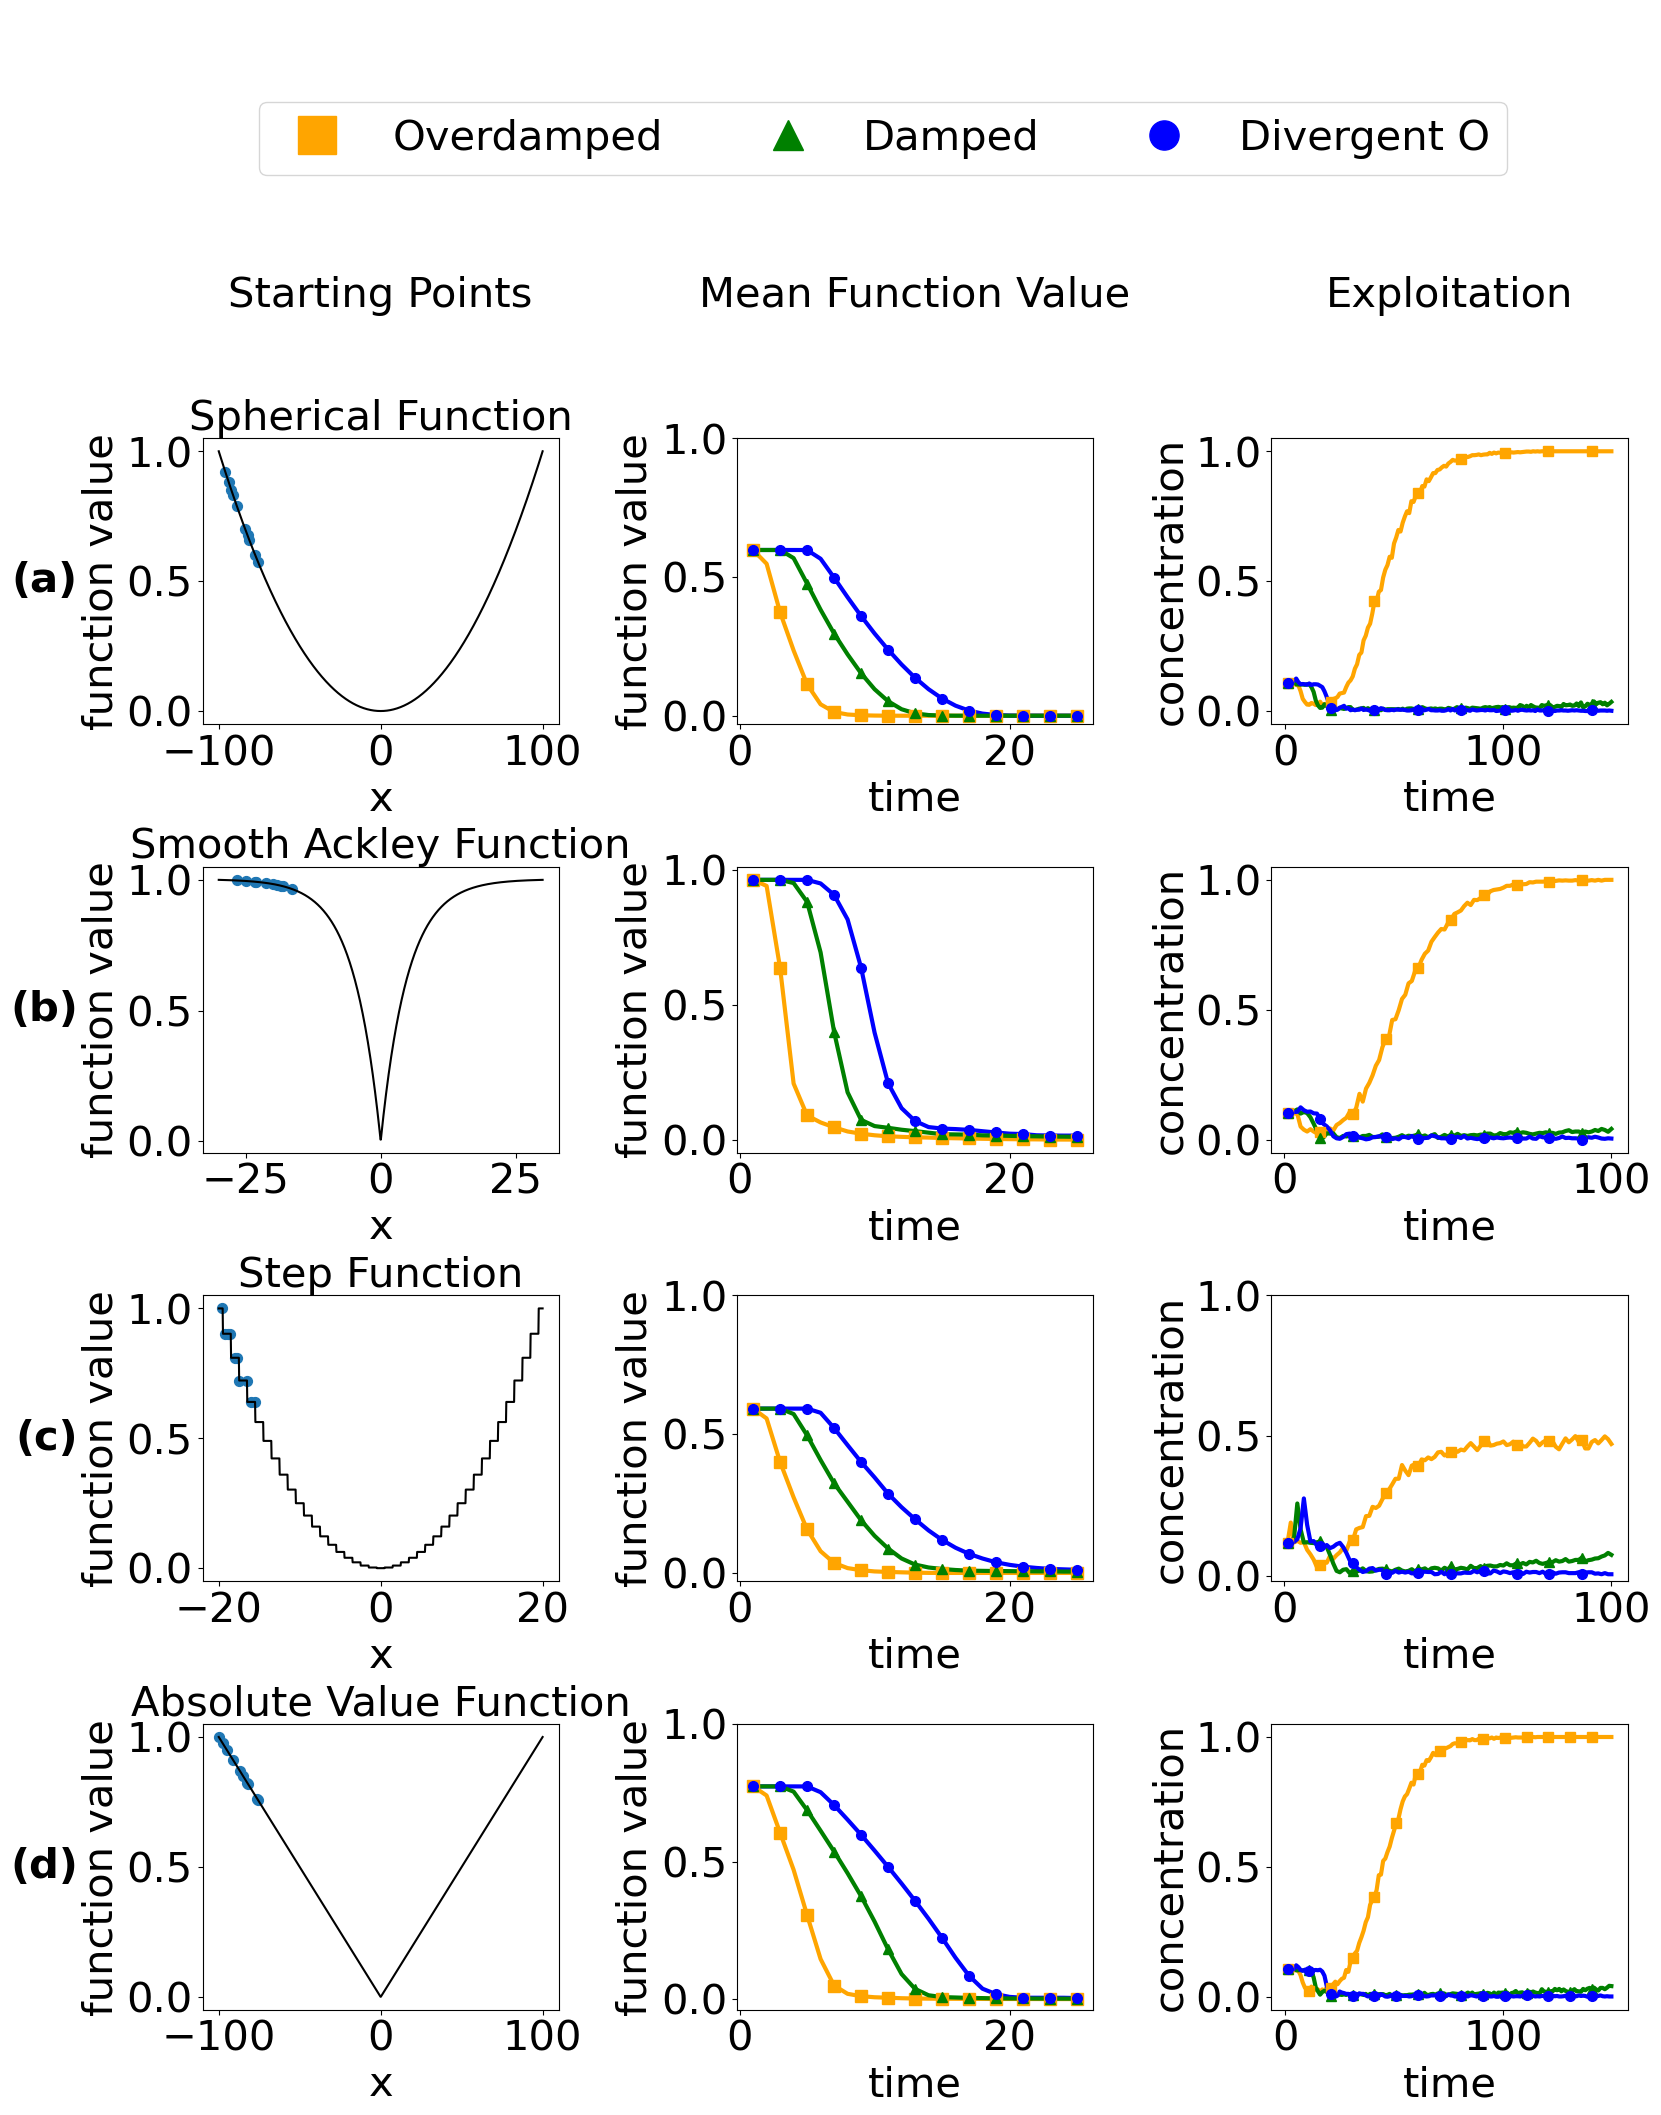

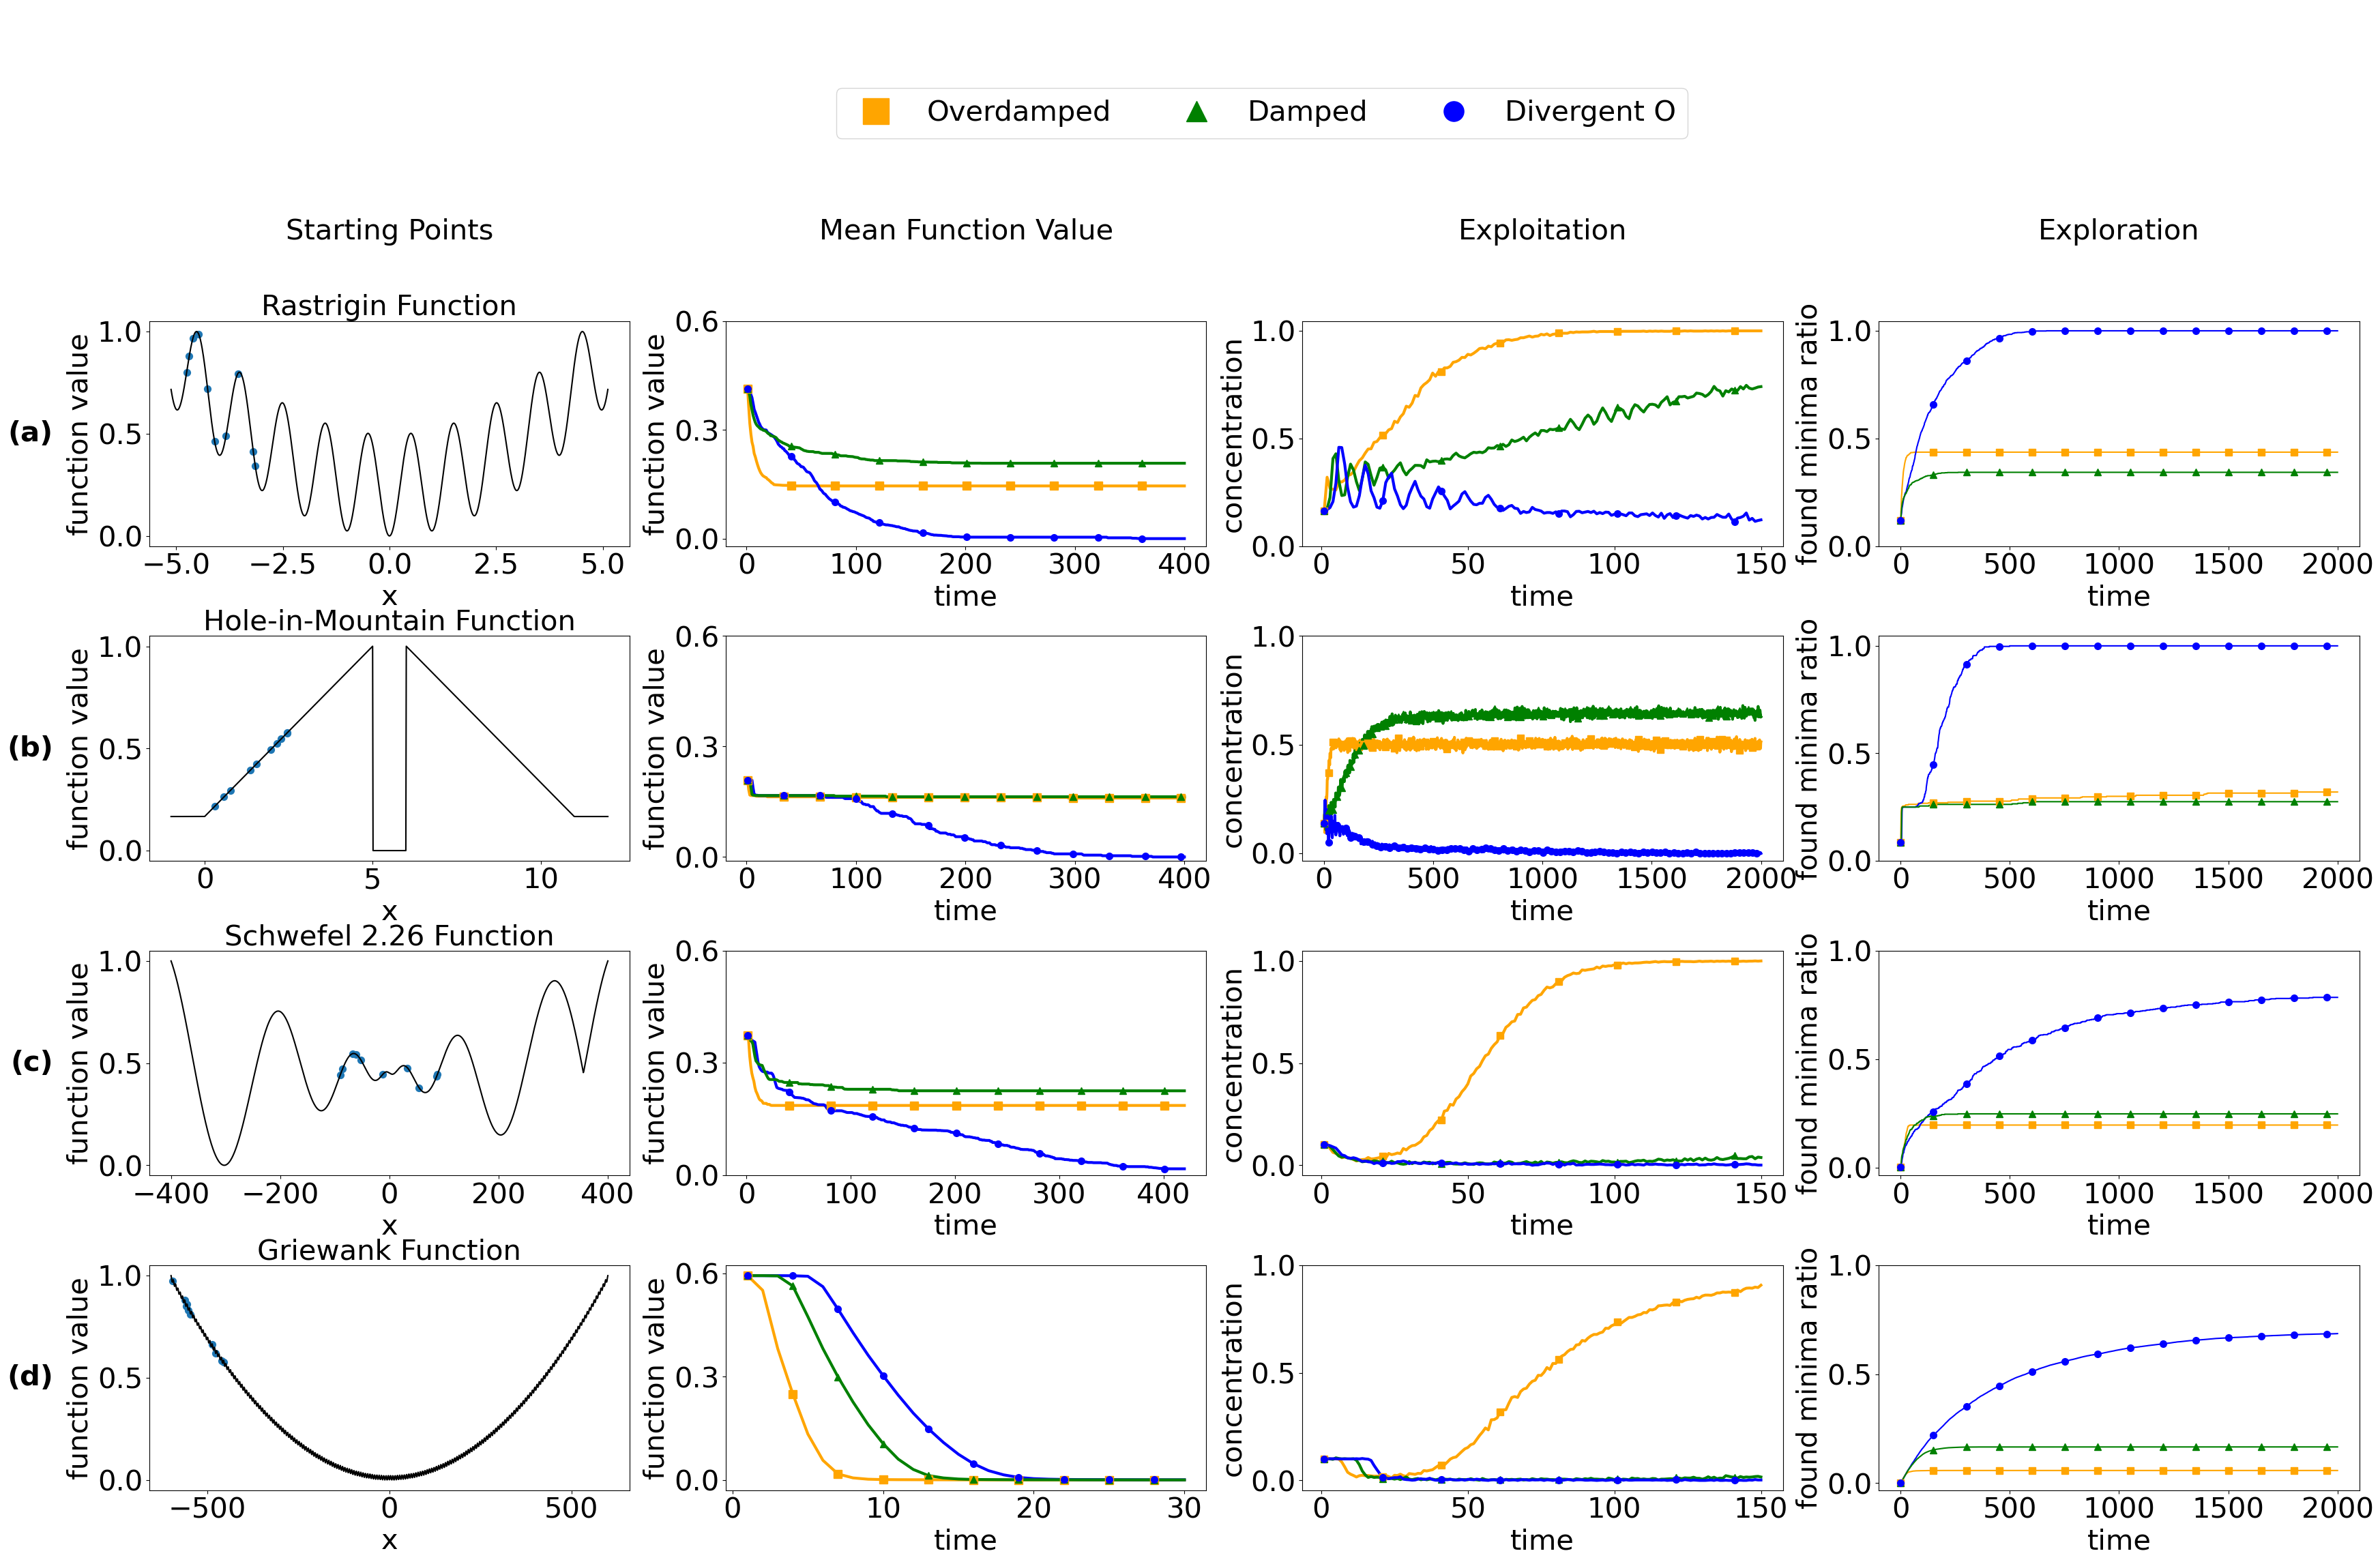

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from Functions import * 
from Variables import *

some_simulation=0 # choose one simulation to plot the starting points

# domain of 1D functions

Bdl=[-100,-5.12, -30, -20, -100,-1, -400, -600] 
Bdu=[100,5.12, 30,20, 100, 12, 400, 600]      

# %% Plot unimodal

legend_fontsize=30
l=1 # row
cols=3
rows=5

FunctionNames=['Spherical Function', 'Rastrigin Function', 'Smooth Ackley Function','Step Function', 'Absolute Value Function',
               'Hole-in-Mountain Function', 'Schwefel 2.26 Function', 'Griewank Function']

Txt=['Starting Points',  'Mean Function Value', 'Exploitation']

#fig, axs = plt.subplots(rows, cols, figsize=(7.5 * cols, 10 * rows))
#plt.subplots_adjust(top=0.7, bottom=-0.022,left=-0.07, right=0.95)

fig, axs = plt.subplots(rows, cols, figsize=(15, 25))  # Adjust the width and height as needed

# Adjust the subplots margins
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=0.95, hspace=0.5, wspace=0.5)  # Adjust the margins as needed

for r in range(cols):
    
    axsi = axs[0, r]
    txt = axsi.text(0.5, 0.5, str(Txt[r]), fontsize=30, ha='center', va='center', transform=axsi.transAxes)
    txt.set_position((txt.get_position()[0], txt.get_position()[1] - 0.5))  # Adjust the y position
    axsi.set_axis_off()
    
    
 
UnimodalNumber=[0,2,3,4] # number of unimodal functions

for i in range(4):
    # plot starting points and the function
    
    X=np.linspace(Bdl[UnimodalNumber[i]], Bdu[UnimodalNumber[i]],1000)
    
    axsi=axs[l,0]
    axsi.set_title(str(FunctionNames[UnimodalNumber[i]]), fontsize=30)
    l=l+1 # next row
    fct=FunctionList[UnimodalNumber[i]]
   

    Y=np.zeros(1000)
    for j in range(1000):
        Y[j]=fct(X[j])
    
    axsi.plot(X,Y,color='black' )
    
    
    SW_Y=np.zeros(n)
    for j in range(n):
        SW_Y[j]=fct(StartingPoints[0,j,some_simulation,UnimodalNumber[i]])
        
    axsi.scatter(StartingPoints[0,:,some_simulation,UnimodalNumber[i]], SW_Y, s=50)
    axsi.tick_params(axis='x', labelsize=30)
    axsi.tick_params(axis='y', labelsize=30)
    axsi.set_xlabel('x',  fontsize=30)
    axsi.set_ylabel('function value',fontsize=30)
    min_value = 0.0  
    max_value = 1.0 
    y_ticks = np.arange(min_value, max_value + 0.5, 0.5)  
    
    # Set the y-axis ticks and format them to 1 decimal place
    axsi.set_yticks(y_ticks)
    axsi.set_yticklabels([f'{tick:.1f}' for tick in y_ticks])
    axsi.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
  

l=1
T_PSO_med=np.array([25,400,25,25,25,400,420,30]) # till which time-step to plot the mean function value

ME=[2,40,2,2,2,33,40,3] # marker every for mean function value
ME2=[20,20,10,10,10,20,20,20] # marker every for concentration

for i in range(4):
    # plot mean

    # load exploitationn and mean

    MeanDivergent=np.load('./Results/Mean'+str(nameDivergent[UnimodalNumber[i]])+'.npy')
    MeanOverdamped=np.load('./Results/Mean'+str(nameOverdamped[UnimodalNumber[i]])+'.npy')
    MeanDamped=np.load('./Results/Mean'+str(nameDamped[UnimodalNumber[i]])+'.npy')

    
    axsi=axs[l,1]
    l=l+1
    
    axsi.plot(np.linspace(1, T_PSO_med[UnimodalNumber[i]], T_PSO_med[UnimodalNumber[i]]), MeanOverdamped[0:T_PSO_med[UnimodalNumber[i]]],  linewidth=3.0,color='orange')
    axsi.plot(np.linspace(1, T_PSO_med[UnimodalNumber[i]], T_PSO_med[UnimodalNumber[i]]), MeanDivergent[0:T_PSO_med[UnimodalNumber[i]]],  linewidth=3.0,color='blue')
    axsi.plot(np.linspace(1, T_PSO_med[UnimodalNumber[i]], T_PSO_med[UnimodalNumber[i]]), MeanDamped[0:T_PSO_med[UnimodalNumber[i]]], linewidth=3.0,color='green')
    axsi.plot(np.linspace(1, T_PSO_med[UnimodalNumber[i]], T_PSO_med[UnimodalNumber[i]]), MeanOverdamped[0:T_PSO_med[UnimodalNumber[i]]], 's', markevery=ME[UnimodalNumber[i]], markersize=9, color='orange',label='Overdamped')
    axsi.plot(np.linspace(1, T_PSO_med[UnimodalNumber[i]], T_PSO_med[UnimodalNumber[i]]), MeanDamped[0:T_PSO_med[UnimodalNumber[i]]], '^', markevery=ME[UnimodalNumber[i]],markersize=7, color='green',  label='Damped')
    axsi.plot(np.linspace(1, T_PSO_med[UnimodalNumber[i]], T_PSO_med[UnimodalNumber[i]]), MeanDivergent[0:T_PSO_med[UnimodalNumber[i]]], 'o', markevery=ME[UnimodalNumber[i]],markersize=7,color='blue',label='Divergent O')
    
    min_value = 0.0  
    max_value = 1.0 
    y_ticks = np.arange(min_value, max_value + 0.5, 0.5)  
    
    # Set the y-axis ticks and format them to 1 decimal place
    axsi.set_yticks(y_ticks)
    axsi.set_yticklabels([f'{tick:.1f}' for tick in y_ticks])
    axsi.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
  
    
    axsi.tick_params(axis='x', labelsize=30)
    axsi.tick_params(axis='y', labelsize=30)
    axsi.set_xlabel('time',  fontsize=30)
    axsi.set_ylabel('function value',fontsize=30)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)


l=1
T_PSOc=[150,150,100,100,150,2000,150,150]
for i in range(4):

    # plot exploitation

    exploitationDivergent=np.load('./Results/AveragedConcentration'+str(nameDivergent[UnimodalNumber[i]])+'.npy')
    exploitationOverdamped=np.load('./Results/AveragedConcentration'+str(nameOverdamped[UnimodalNumber[i]])+'.npy')
    exploitationDamped=np.load('./Results/AveragedConcentration'+str(nameDamped[UnimodalNumber[i]])+'.npy')

    axsi=axs[l,2]
    l=l+1
    axsi.plot(np.linspace(1, T_PSOc[UnimodalNumber[i]], T_PSOc[UnimodalNumber[i]]), exploitationOverdamped[0:T_PSOc[UnimodalNumber[i]]], linewidth=3.0,color='orange',label='Overdamped')
    axsi.plot(np.linspace(1, T_PSOc[UnimodalNumber[i]], T_PSOc[UnimodalNumber[i]]), exploitationDamped[0:T_PSOc[UnimodalNumber[i]]],linewidth=3,color='green',label='Damped')
    axsi.plot(np.linspace(1, T_PSOc[UnimodalNumber[i]], T_PSOc[UnimodalNumber[i]]),exploitationDivergent[0:T_PSOc[UnimodalNumber[i]]], linewidth=3.0,color='blue',  label='Divergent O')
    axsi.plot(np.linspace(1, T_PSOc[UnimodalNumber[i]], T_PSOc[UnimodalNumber[i]]), exploitationOverdamped[0:T_PSOc[UnimodalNumber[i]]],'s', markevery=ME2[UnimodalNumber[i]], markersize=7, color='orange',label='Overdamped')
    axsi.plot(np.linspace(1, T_PSOc[UnimodalNumber[i]], T_PSOc[UnimodalNumber[i]]), exploitationDamped[0:T_PSOc[UnimodalNumber[i]]], '^', markevery=ME2[UnimodalNumber[i]],markersize=7,color='green',label='Damped')
    axsi.plot(np.linspace(1, T_PSOc[UnimodalNumber[i]], T_PSOc[UnimodalNumber[i]]),exploitationDivergent[0:T_PSOc[UnimodalNumber[i]]],'o', markevery=ME2[UnimodalNumber[i]],markersize=7 ,color='blue',  label='Divergent O')
    
    axsi.tick_params(axis='x', labelsize=30)
    axsi.tick_params(axis='y', labelsize=30)
    axsi.set_xlabel('time', fontsize=30)
    axsi.set_ylabel('concentration', fontsize=30)
    min_value = 0.0  
    max_value = 1.0 
    y_ticks = np.arange(min_value, max_value + 0.5, 0.5)  
    
    # Set the y-axis ticks and format them to 1 decimal place
    axsi.set_yticks(y_ticks)
    axsi.set_yticklabels([f'{tick:.1f}' for tick in y_ticks])
    axsi.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
    axsi.yaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))  # Format y-axis ticks
  
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)      
axs[1,1].legend(bbox_to_anchor=(-1.4, 1.65, 1, 0.6), loc="upper left",
               ncol=4,  prop={'size': legend_fontsize}, markerscale=3)

axs[0, 0].text(-0.35, -1, '(a)', transform=axs[0, 0].transAxes, fontsize=30, va='center', ha='right',weight='bold' )
axs[1, 0].text(-0.35, -1, '(b)', transform=axs[1, 0].transAxes, fontsize=30, va='center', ha='right',weight='bold')
axs[2, 0].text(-0.35, -1, '(c)', transform=axs[2, 0].transAxes, fontsize=30, va='center', ha='right',weight='bold')
axs[3, 0].text(-0.35, -1, '(d)', transform=axs[3, 0].transAxes, fontsize=30, va='center', ha='right',weight='bold')


plt.savefig('./Plots/Fig7.png',  bbox_inches='tight')

# %% Plot multimodal


l=1
cols=4
rows=5

Txt=['Starting Points',  'Mean Function Value', 'Exploitation', 'Exploration']
# Create the subplots with adjusted figure size and layout
fig, axs = plt.subplots(rows, cols, figsize=(9 * cols, 5 * rows))
plt.subplots_adjust(top=0.95, bottom=0.08, left=0.05, right=0.95, hspace=0.4, wspace=0.2)

# Loop through each column to set the subplot titles
for r in range(cols):
    axsi = axs[0, r]
    txt = axsi.text(0.5, 0.5, str(Txt[r]), fontsize=30, ha='center', va='center', transform=axsi.transAxes)
    txt.set_position((txt.get_position()[0], txt.get_position()[1] - 0.5))  # Adjust the y position
    axsi.set_axis_off()
    
    
l=1
MultimodalNumber=[1,5,6,7]
for i in range(4):
    # plot starting points and the function
    
    X=np.linspace(Bdl[MultimodalNumber[i]], Bdu[MultimodalNumber[i]],1000)
    
    axsi=axs[l,0]
    axsi.set_title(str(FunctionNames[MultimodalNumber[i]]), fontsize=30)
    l=l+1
    fct=FunctionList[MultimodalNumber[i]]
    Y=np.zeros(1000)
    for j in range(1000):
        Y[j]=fct(X[j])
    
    axsi.plot(X,Y,color='black' )
    SW_Y=np.zeros(n)
    for j in range(n):
        SW_Y[j]=fct(StartingPoints[0,j,some_simulation,MultimodalNumber[i]])
        
    axsi.scatter(StartingPoints[0,:,some_simulation,MultimodalNumber[i]], SW_Y,  s=50)
    axsi.tick_params(axis='x', labelsize=30)
    axsi.tick_params(axis='y', labelsize=30)
    axsi.set_xlabel('x',  fontsize=30)
    axsi.set_ylabel('function value',fontsize=30)
    min_value = 0.0  
    max_value = 1.0 
    y_ticks = np.arange(min_value, max_value + 0.5, 0.5)  
    
    # Set the y-axis ticks and format them to 1 decimal place
    axsi.set_yticks(y_ticks)
    axsi.set_yticklabels([f'{tick:.1f}' for tick in y_ticks])
l=1


for i in range(4):
    
    # load exploitationn and mean

    MeanDivergent=np.load('./Results/Mean'+str(nameDivergent[MultimodalNumber[i]])+'.npy')
    MeanOverdamped=np.load('./Results/Mean'+str(nameOverdamped[MultimodalNumber[i]])+'.npy')
    MeanDamped=np.load('./Results/Mean'+str(nameDamped[MultimodalNumber[i]])+'.npy')
    
    
    # plot mean

    axsi=axs[l,1]
    l=l+1
    axsi.plot(np.linspace(1, T_PSO_med[MultimodalNumber[i]], T_PSO_med[MultimodalNumber[i]]), MeanOverdamped[0:T_PSO_med[MultimodalNumber[i]]],  linewidth=3.0,color='orange')
    axsi.plot(np.linspace(1, T_PSO_med[MultimodalNumber[i]], T_PSO_med[MultimodalNumber[i]]), MeanDivergent[0:T_PSO_med[MultimodalNumber[i]]],  linewidth=3.0,color='blue')
    axsi.plot(np.linspace(1, T_PSO_med[MultimodalNumber[i]], T_PSO_med[MultimodalNumber[i]]), MeanDamped[0:T_PSO_med[MultimodalNumber[i]]], linewidth=3.0,color='green')
    axsi.plot(np.linspace(1, T_PSO_med[MultimodalNumber[i]], T_PSO_med[MultimodalNumber[i]]), MeanOverdamped[0:T_PSO_med[MultimodalNumber[i]]], 's', markevery=ME[MultimodalNumber[i]], markersize=9, color='orange',label='Overdamped')
    axsi.plot(np.linspace(1, T_PSO_med[MultimodalNumber[i]], T_PSO_med[MultimodalNumber[i]]), MeanDamped[0:T_PSO_med[MultimodalNumber[i]]], '^', markevery=ME[MultimodalNumber[i]],markersize=7,color='green',label='Damped')
    axsi.plot(np.linspace(1, T_PSO_med[MultimodalNumber[i]], T_PSO_med[MultimodalNumber[i]]), MeanDivergent[0:T_PSO_med[MultimodalNumber[i]]], 'o', markevery=ME[MultimodalNumber[i]],markersize=7, color='blue',  label='Divergent O')
 
    axsi.tick_params(axis='x', labelsize=30)
    axsi.tick_params(axis='y', labelsize=30)
    axsi.set_xlabel('time',  fontsize=30)
    axsi.set_ylabel('function value',fontsize=30)
    min_value = 0.0  
    max_value = 0.6
    y_ticks = np.arange(min_value, max_value + 0.3, 0.3)  
    
    # Set the y-axis ticks and format them to 1 decimal place
    axsi.set_yticks(y_ticks)
    axsi.set_yticklabels([f'{tick:.1f}' for tick in y_ticks])
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)


l=1

for i in range(4):

    # plot exploitation

    exploitationDivergent=np.load('./Results/AveragedConcentration'+str(nameDivergent[MultimodalNumber[i]])+'.npy')
    exploitationOverdamped=np.load('./Results/AveragedConcentration'+str(nameOverdamped[MultimodalNumber[i]])+'.npy')
    exploitationDamped=np.load('./Results/AveragedConcentration'+str(nameDamped[MultimodalNumber[i]])+'.npy')

    axsi=axs[l,2]
    l=l+1
    axsi.plot(np.linspace(1, T_PSOc[MultimodalNumber[i]], T_PSOc[MultimodalNumber[i]]), exploitationOverdamped[0:T_PSOc[MultimodalNumber[i]]],linewidth=3.0,color='orange',label='Overdamped')
    axsi.plot(np.linspace(1, T_PSOc[MultimodalNumber[i]], T_PSOc[MultimodalNumber[i]]), exploitationDamped[0:T_PSOc[MultimodalNumber[i]]],linewidth=3,color='green',label='Damped')
    axsi.plot(np.linspace(1, T_PSOc[MultimodalNumber[i]], T_PSOc[MultimodalNumber[i]]),exploitationDivergent[0:T_PSOc[MultimodalNumber[i]]],linewidth=3.0,color='blue',  label='Divergent')
    
    axsi.plot(np.linspace(1, T_PSOc[MultimodalNumber[i]], T_PSOc[MultimodalNumber[i]]), exploitationOverdamped[0:T_PSOc[MultimodalNumber[i]]],'s', markevery=ME2[MultimodalNumber[i]], markersize=7, color='orange',label='Overdamped')
    axsi.plot(np.linspace(1, T_PSOc[MultimodalNumber[i]], T_PSOc[MultimodalNumber[i]]), exploitationDamped[0:T_PSOc[MultimodalNumber[i]]], '^', markevery=ME2[MultimodalNumber[i]],markersize=7,color='green',label='Damped')
    axsi.plot(np.linspace(1, T_PSOc[MultimodalNumber[i]], T_PSOc[MultimodalNumber[i]]),exploitationDivergent[0:T_PSOc[MultimodalNumber[i]]],'o', markevery=ME2[MultimodalNumber[i]],markersize=7 ,color='blue',  label='Divergentr')
    
    axsi.tick_params(axis='x', labelsize=30)
    axsi.tick_params(axis='y', labelsize=30)
    axsi.set_xlabel('time', fontsize=30)
    axsi.set_ylabel('concentration', fontsize=30)
    axsi.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
    min_value = 0.0  
    max_value = 1.0 
    y_ticks = np.arange(min_value, max_value + 0.5, 0.5)  
    
    # Set the y-axis ticks and format them to 1 decimal place
    axsi.set_yticks(y_ticks)
    axsi.set_yticklabels([f'{tick:.1f}' for tick in y_ticks])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)  


l=1

for i in range(4):
    
    # plot exploration

    explorationDivergent=np.load('./Results/Exploration'+str(nameDivergent[MultimodalNumber[i]])+'.npy')
    explorationOverdamped=np.load('./Results/Exploration'+str(nameOverdamped[MultimodalNumber[i]])+'.npy')
    explorationDamped=np.load('./Results/Exploration'+str(nameDamped[MultimodalNumber[i]])+'.npy')    
    
    axsi=axs[l,3]
    l=l+1
    axsi.plot(np.linspace(1,T_PSO,T_PSO), explorationOverdamped, color='orange', label='Overdamped')
    axsi.plot(np.linspace(1,T_PSO,T_PSO), explorationDivergent, color='blue', label='Divergent O')
    axsi.plot(np.linspace(1,T_PSO,T_PSO), explorationDamped, color='green', label='Damped')
    
    axsi.plot(np.linspace(1, T_PSO, T_PSO), explorationOverdamped[0:T_PSO],'s', markevery=150, markersize=7, color='orange',label='Overdamped')
    axsi.plot(np.linspace(1, T_PSO, T_PSO), explorationDamped[0:T_PSO], '^', markevery=150,markersize=7,color='green',label='Damped')
    axsi.plot(np.linspace(1, T_PSO, T_PSO),explorationDivergent[0:T_PSO],'o', markevery=150,markersize=7 ,color='blue',  label='Divergent O')
    
    axsi.set_xlabel('time', fontsize=30)
    axsi.set_ylabel('found minima ratio', fontsize=29)
    axsi.tick_params(axis='x', labelsize=30)
    axsi.tick_params(axis='y', labelsize=30)
    min_value = 0.0  
    max_value = 1.0 
    y_ticks = np.arange(min_value, max_value + 0.5, 0.5)  
    
    # Set the y-axis ticks and format them to 1 decimal place
    axsi.set_yticks(y_ticks)
    axsi.set_yticklabels([f'{tick:.1f}' for tick in y_ticks])
    axsi.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
  
        
axs[1,1].legend(bbox_to_anchor=(0.2, 1.5, 1, 0.6), loc="upper left",
               ncol=4,  prop={'size': legend_fontsize}, markerscale=3)


axs[0, 0].text(-0.2, -0.9, '(a)', transform=axs[0, 0].transAxes, fontsize=30, va='center', ha='right',weight='bold')
axs[1, 0].text(-0.2, -0.9, '(b)', transform=axs[1, 0].transAxes, fontsize=30, va='center', ha='right',weight='bold')
axs[2, 0].text(-0.2, -0.9, '(c)', transform=axs[2, 0].transAxes, fontsize=30, va='center', ha='right',weight='bold')
axs[3, 0].text(-0.2, -0.9, '(d)', transform=axs[3, 0].transAxes, fontsize=30, va='center', ha='right',weight='bold')


plt.savefig('./Plots/Fig8.png',  bbox_inches='tight', dpi=400)



